# 理論

## 総入力関数

$$
y = w^T x+ b
$$

## softmax関数
ロジスティック回帰では、シグモイド関数を使用して、2値分類を行いました。
今度は、手書きの数字画像を認識するので、2値ではなく0から9までのどれかに
分類する必要があります。このような問題を　**多クラス分類** とよびます。
多クラス分類を行う場合は、シグモド関数ではなく、**ソフトマックス関数** と呼ばれる
関数を使用します。

ソフトマックス関数

$$
\begin{align}
softmax(y) &= \frac{exp(x_i)}{ \sum_{j=1}^{n} exp(x_j)}　\tag{1.1}
\end{align}
$$

理論上は式(1.1）のようになりますが、このままコンピュータで計算するとオーバーフローを起こすので
実際のプログラミングでは以下のように変形します。

任意の定数Cを分母分子に掛ける
$$
\begin{align}
softmax(y) &= \frac{Cexp(x_i)}{ C\sum_{j=1}^{n} exp(x_j)}　\\
&=\frac{Cexp(x_i + logC)}{ C\sum_{j=1}^{n} exp(x_j + logC)}　\\
&=\frac{Cexp(x_i + C')}{ C\sum_{j=1}^{n} exp(x_j + C')}　\tag{1.2}
\end{align}
$$

TensorFlowでは、softmax関数で実装されているので、理論通り考えて差し支えありません。


In [1]:
#
#数式(1.1)のとおりだとオーバーフローしてしまう。
#
import numpy as np
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

softmax(np.array([1010,1000,990]))

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


array([ nan,  nan,  nan])

In [2]:
#
#数式(1.2)のとおりだと計算できる
#
import numpy as np
#Cを-1000として
C=-1000
def softmax2(x):
    x
    x2 = x + C
    return np.exp(x2) / np.sum(np.exp(x2))

y = softmax2(np.array([1010,1000,990]))
y

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

In [3]:
sum(y)

1.0

In [4]:
np.sum(y)

1.0

上記の例とおおり、ソフトマックス関数の合計は1.0とななる。各値がそれぞれの多クラスの正解ラベルとなる確率を表す。

### 確率の表現
$N$個の入力データ $x_n(n=1,2,3,\cdots,n)$ とそれに対応する正解データ　$t_n $ としたときに、<br>
$x_n$がクラス$k$に属するときの$t_n$の$j$番目の成分は
$$
t_{nj}=
\left\{
\begin{array}{ll}
1 & (j = k) \\
0 & (j \neq 0)
\end{array}
\right.
$$
と表現される。
クラス$k$に属する確率は
$$
\begin{align}
P(C=k | x) &= softmax(w^T + b )  \\
&=\frac{Cexp(w_k^T + b)}{ C\sum_{j=1}^{n} exp(w_k^T + b)}　\tag{1.3}
\end{align}
$$

#### 尤度関数
ロジスティクス回帰と同様に尤度関数を考えると、

式(1.3)より
<br>
<br>
$$
\begin{align}
L(w,b) &=\prod_{n=1}^{N}\prod_{k=1}^{K}P(C=t_{nk}|x_n)^{t_{nk}} \\
 &=\prod_{n=1}^{N}\prod_{k=1}^{K}y_{nk}^{t_nk} \tag{1.4}
\end{align}
$$

尤度関数を最大化する重みを見つければ良いが、尤度関数は積の形をしており、計算を単純化するためには式(1.5)の対数をとり和の形で表現します。
得られた誤差関数Eを勾配降下法で最小となる重みを計算します。

$$
\begin{align}
E(w,b) &= -logL(w,b) \\
&= -\sum_{n=1}^{N}\sum_{k=1}^{K}t_{nk}logy_{nk} \tag{1.5}
\end{align}\
$$




誤差関数Eの偏微分は以下のようになる。
$$
\begin{align}
\frac{\partial E}{\partial w_j} &= 
\sum_{n=1}^{N}\sum_{k=1}^{K}\frac{\partial }{\partial y_{nk}}(t_{nk}logy_{nk})\frac{\partial y_{nk}}{\partial a_{nj}} \frac{\partial a_{nj}}{\partial w_{nj}}\\
&= - \sum_{n=1}^{N}\sum_{k=1}^{K}\frac{t_{nk}}{y_{nk}}  \frac{\partial y_{nk}}{\partial a_{nj}}x_n\\
&= -  \sum_{n=1}^{N}\lgroup\sum_{k=1}^{K}t_{nk}I_{kj}- \sum_{k=1}t_{nl}y_{nk})x_n\\
&=  - \sum_{n=1}^{N}(t_{nj}-y_{nj})x_n \tag{1.6}
\end{align}\
$$
同様にバイアスに関しても偏微分すると、

$$
\begin{align}
\frac{\partial E}{\partial b_j} &=  - \sum_{n=1}^{N}(t_{nj}-y_{nj}) 　\tag{1.7}
\end{align}\
$$

最終的に

$$
\begin{align}
\frac{\partial E}{\partial W} &=  - \sum_{n=1}^{N}(t_{n}-y_{n})X_n^T 　\tag{1.8}
\end{align}\
$$
$$
\begin{align}
\frac{\partial E}{\partial b} &=  - \sum_{n=1}^{N}(t_{n}-y_{n})　\tag{1.9}
\end{align}\
$$


が得られる。

## データの読み込み

# 手書き画像認識

In [4]:
! pip3 install --upgrade tensorflow

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data


mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

#MNISTデータがダウンロードできない場合は、ファイルをMNIST_data
#ディレクトリに展開して、以下の行を実行すると
#取り込めます
#mnist = input_data.read_data_sets('MNIST_data',one_hot=True)   
images, labels = mnist.train.next_batch(10)

print("done")

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/site-packages
Requirement already up-to-date: six>=1.10.0 in /usr/local/lib/python3.6/site-packages (from tensorflow)
Requirement already up-to-date: astor>=0.6.0 in /usr/local/lib/python3.6/site-packages (from tensorflow)
Requirement already up-to-date: protobuf>=3.4.0 in /usr/local/lib/python3.6/site-packages (from tensorflow)
Requirement already up-to-date: termcolor>=1.1.0 in /usr/local/lib/python3.6/site-packages (from tensorflow)
Requirement already up-to-date: gast>=0.2.0 in /usr/local/lib/python3.6/site-packages (from tensorflow)
Requirement already up-to-date: grpcio>=1.8.6 in /usr/local/lib/python3.6/site-packages (from tensorflow)
Requirement already up-to-date: numpy>=1.13.3 in /usr/local/lib/python3.6/site-packages (from tensorflow)
Requirement already up-to-date: tensorboard<1.9.0,>=1.8.0 in /usr/local/lib/python3.6/site-packages (from tensorflow)
Requirement already up-to-date: wheel>=0.26 in /usr/loc

## データの確認

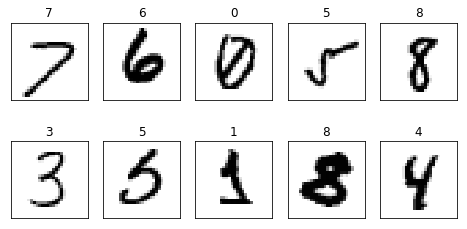

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(8,4))
for c, (image, label) in enumerate(zip(images, labels),start=1):
    subplot = fig.add_subplot(2,5,c)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % np.argmax(label))
    subplot.imshow(image.reshape((28,28)), vmin=0, vmax=1,
                   cmap=plt.cm.gray_r, interpolation="nearest")

## 計算モデルの定義

In [6]:
x = tf.placeholder(tf.float32, [None, 784])
#重みの数　　784　X　10
w = tf.Variable(tf.truncated_normal([784,10],stddev=0.1))
#バイアスは10個
w0 = tf.Variable(tf.zeros([10]))
#総入力関数
f = tf.matmul(x, w) + w0
#ソフトマックス関数
p = tf.nn.softmax(f)
#ソフトマックス関数の出力
t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
#AdamOptimizerを使用する。
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(loss)

correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## 計算実行

In [7]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(10000):
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, t: batch_ts})
    if i % 1000 == 0:
        loss_val, acc_val = sess.run([loss, accuracy],
            feed_dict={x:mnist.test.images, t: mnist.test.labels})
        print ('Step:', i ,'Loss:',loss, 'Accuracy:',acc_val)

Step: 0 Loss: Tensor("Neg:0", shape=(), dtype=float32) Accuracy: 0.2837
Step: 1000 Loss: Tensor("Neg:0", shape=(), dtype=float32) Accuracy: 0.9136
Step: 2000 Loss: Tensor("Neg:0", shape=(), dtype=float32) Accuracy: 0.9215
Step: 3000 Loss: Tensor("Neg:0", shape=(), dtype=float32) Accuracy: 0.9112
Step: 4000 Loss: Tensor("Neg:0", shape=(), dtype=float32) Accuracy: 0.9195
Step: 5000 Loss: Tensor("Neg:0", shape=(), dtype=float32) Accuracy: 0.9142
Step: 6000 Loss: Tensor("Neg:0", shape=(), dtype=float32) Accuracy: 0.9231
Step: 7000 Loss: Tensor("Neg:0", shape=(), dtype=float32) Accuracy: 0.9205
Step: 8000 Loss: Tensor("Neg:0", shape=(), dtype=float32) Accuracy: 0.9239
Step: 9000 Loss: Tensor("Neg:0", shape=(), dtype=float32) Accuracy: 0.9187


# 3層　ニューラルネットワークによる画像認識

## 計算モデル作成

In [8]:
#入力
x = tf.placeholder(tf.float32, [None, 784])
#入力から隠れ層への重み　784 x 64 個
w_1 = tf.Variable(tf.truncated_normal([784,64],stddev=0.1))

b_1 = tf.Variable(tf.zeros([64]))
#隠れ層への入力
h_1 = tf.nn.relu(tf.matmul(x,w_1) + b_1 )

#出力層
w_2 = tf.Variable(tf.truncated_normal([64,10],stddev=0.1))
b_2 = tf.Variable(tf.zeros([10]))
f = tf.matmul(h_1, w_2) + b_2
#ソフトマックス関数
p = tf.nn.softmax(f)

t = tf.placeholder(tf.float32, [None, 10])
loss = -tf.reduce_sum(t * tf.log(p))
#loss = tf.reduce_mean(tf.square(t-p))
train_step = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

correct_prediction = tf.equal(tf.argmax(p, 1), tf.argmax(t, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

## 計算実行

In [9]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(2000):
    batch_xs, batch_ts = mnist.train.next_batch(100)
    sess.run(train_step, feed_dict={x: batch_xs, t: batch_ts})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss, accuracy],
            feed_dict={x:mnist.test.images, t: mnist.test.labels})
        print ('Step:', i ,'Loss:',loss, 'Accuracy:',acc_val)

/usr/local/Cellar/python3/3.6.2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


Step: 0 Loss: Tensor("Neg_1:0", shape=(), dtype=float32) Accuracy: 0.1099
Step: 100 Loss: Tensor("Neg_1:0", shape=(), dtype=float32) Accuracy: 0.8533
Step: 200 Loss: Tensor("Neg_1:0", shape=(), dtype=float32) Accuracy: 0.8849
Step: 300 Loss: Tensor("Neg_1:0", shape=(), dtype=float32) Accuracy: 0.899
Step: 400 Loss: Tensor("Neg_1:0", shape=(), dtype=float32) Accuracy: 0.9034
Step: 500 Loss: Tensor("Neg_1:0", shape=(), dtype=float32) Accuracy: 0.9097
Step: 600 Loss: Tensor("Neg_1:0", shape=(), dtype=float32) Accuracy: 0.9148
Step: 700 Loss: Tensor("Neg_1:0", shape=(), dtype=float32) Accuracy: 0.9201
Step: 800 Loss: Tensor("Neg_1:0", shape=(), dtype=float32) Accuracy: 0.9269
Step: 900 Loss: Tensor("Neg_1:0", shape=(), dtype=float32) Accuracy: 0.9269
Step: 1000 Loss: Tensor("Neg_1:0", shape=(), dtype=float32) Accuracy: 0.931
Step: 1100 Loss: Tensor("Neg_1:0", shape=(), dtype=float32) Accuracy: 0.93
Step: 1200 Loss: Tensor("Neg_1:0", shape=(), dtype=float32) Accuracy: 0.9303
Step: 1300 Loss